In [23]:
import pandas as pd


In [61]:
df = pd.read_csv('C:\\Users\\samik\\Untitled Folder 1\\sales_data.csv1.txt', delimiter='\t')


In [77]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01-05-2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [79]:
print(df.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


In [80]:
#data cleaning

In [81]:
df.dropna(inplace=True)

In [82]:
#calculate key metrics

In [85]:
print(df.isnull().sum())


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [89]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

In [90]:
print(df['Quantity Ordered'].dtype)


float64


In [92]:
print(df.isnull().sum())


Order ID             0
Product              0
Quantity Ordered    16
Price Each           0
Order Date           0
Purchase Address     0
dtype: int64


In [97]:
total_sales = df.groupby('Product')['Quantity Ordered'].sum()
print(total_sales)


Product
20in Monitor                   215.0
27in 4K Gaming Monitor         312.0
27in FHD Monitor               419.0
34in Ultrawide Monitor         314.0
AA Batteries (4-pack)         1425.0
AAA Batteries (4-pack)        1596.0
Apple Airpods Headphones       814.0
Bose SoundSport Headphones     659.0
Flatscreen TV                  243.0
Google Phone                   318.0
LG Dryer                        39.0
LG Washing Machine              42.0
Lightning Charging Cable      1151.0
Macbook Pro Laptop             235.0
ThinkPad Laptop                217.0
USB-C Charging Cable          1284.0
Vareebadd Phone                125.0
Wired Headphones              1081.0
iPhone                         379.0
Name: Quantity Ordered, dtype: float64


In [99]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
average_sales = df.groupby(['Product', df['Order Date'].dt.date])['Quantity Ordered'].mean()
print(average_sales)


Product       Order Date
20in Monitor  2019-01-01    1.0
              2019-01-02    1.0
              2019-01-03    1.0
              2019-01-04    1.0
              2019-01-05    1.0
                           ... 
iPhone        2019-01-27    1.0
              2019-01-28    1.0
              2019-01-29    1.0
              2019-01-30    1.0
              2019-01-31    1.0
Name: Quantity Ordered, Length: 577, dtype: float64


In [100]:
#create visualizations

In [101]:
import matplotlib.pyplot as plt

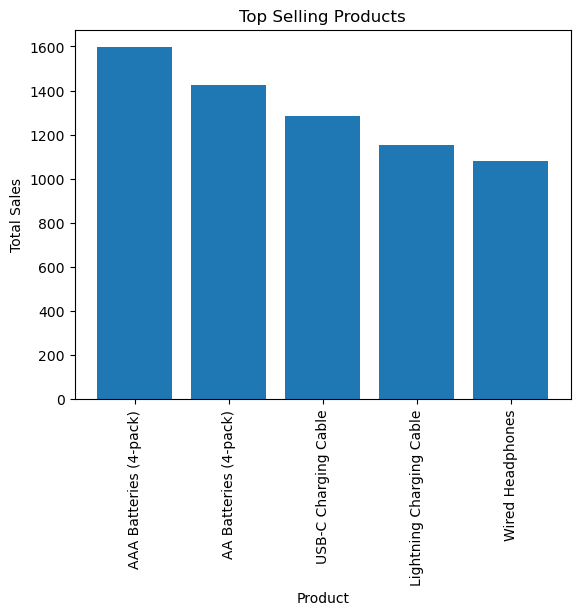

In [108]:
top_products = total_sales.nlargest(5)
plt.bar(top_products.index, top_products.values)
plt.xlabel('Product')
plt.xticks(rotation='vertical')
plt.ylabel('Total Sales')
plt.title('Top Selling Products')
plt.show()

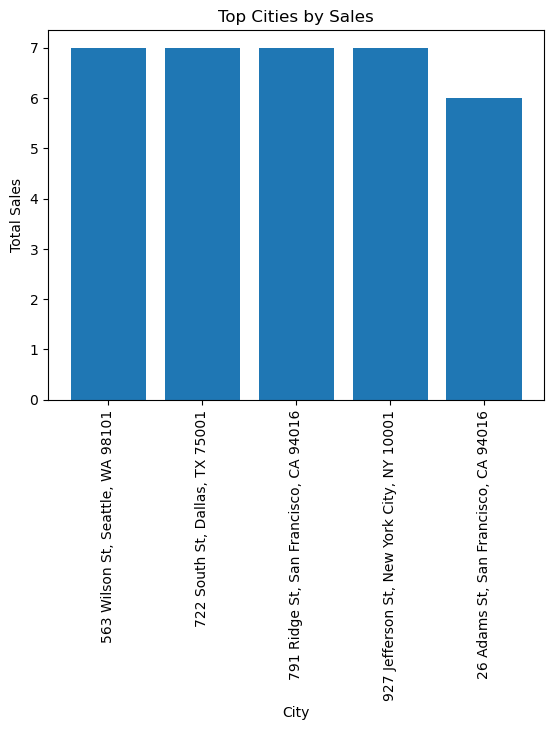

In [109]:
city_sales = df.groupby('Purchase Address')['Quantity Ordered'].sum()
top_cities = city_sales.nlargest(5)
plt.bar(top_cities.index, top_cities.values)
plt.xlabel('City')
plt.xticks(rotation='vertical')
plt.ylabel('Total Sales')
plt.title('Top Cities by Sales')
plt.show()